In [35]:
!pip install numpy
!pip install matplotlib

In [36]:

import numpy as np
import matplotlib.pyplot as plt

In [37]:
N, D_in, H, D_out = 2, 100, 50, 1

In [38]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)
print(x)
print("====")
print(y)

(2, 100)
(2, 1)
[[-1.4626215   1.03805166 -0.62924256 -2.00132329  0.64788984 -1.84187278
   1.49337411 -0.76995307  0.60093775 -0.3706167   0.49869388  0.15824432
   0.11152926  0.20504925  0.50559025 -0.81300524 -0.097267   -0.814128
  -0.33085508  0.80549583  1.12666364 -1.82741568  0.0211949   0.26169461
  -1.434303   -0.6154447  -0.32400818 -0.681282    0.04676969  0.41808204
  -1.18778986  1.34441635 -1.68516626 -0.121684    0.6597549  -0.26722238
   0.09736814 -1.00403768 -2.9365325   0.72488081  1.36751463 -1.539734
  -0.4156771   0.12086617 -1.93545245  2.45368256 -0.51598805 -1.21435204
   0.56099546  0.17062577 -0.70902527  0.44664901 -0.10097208 -1.37509068
   0.25864109  0.78334623  0.52423342 -0.01734428 -0.59219837 -0.55881651
  -1.83915628 -0.50576401 -0.20083068 -0.57519548 -1.09719353  0.931356
   1.10925157  0.88880454  0.52025925 -0.22407536  0.55026966 -0.61342961
   1.74846654 -0.68073266  0.9022279  -2.05999284 -1.24309155 -0.42420726
  -0.43615025  1.98835501  0

In [39]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [40]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred =2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    w1 -= learning_rate * grad_w1 
    w2 -= learning_rate * grad_w2


0 1673.4587606103673
1 1636.7667189550546
2 1600.8863325853997
3 1565.7993633409699
4 1531.4879946402841
5 1497.9348212392952
6 1465.122839259585
7 1433.035436478352
8 1401.6563828724447
9 1370.9698214090076
10 1340.9602590755949
11 1311.6125581427596
12 1282.9119276524048
13 1254.8439151254192
14 1227.394398482296
15 1200.549578170674
16 1174.2959694938934
17 1148.6203951348882
18 1123.5099778699305
19 1098.9521334668507
20 1074.9345637626257
21 1051.4452499152717
22 1028.4724458252788
23 1006.0046717218493
24 984.0307079093902
25 962.5395886699262
26 941.5205963170961
27 920.9632553976514
28 900.8573270364383
29 881.1928034209643
30 861.9599024218437
31 843.1490623453886
32 824.7509368148906
33 806.7563897771031
34 789.1564906306269
35 771.9425094729651
36 755.1059124630873
37 738.6383572965115
38 722.5316887898935
39 706.7779345723202
40 691.3693008804668
41 676.298168454965
42 661.5570885353152
43 647.1387789508553
44 633.0361203052397
45 619.2421522520964
46 605.7500698594613
47 5

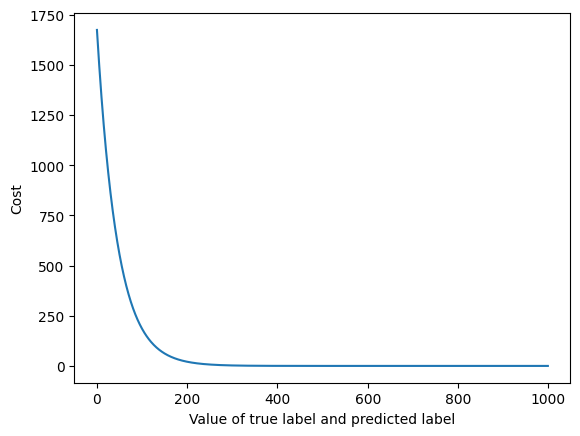

In [42]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()